In [2]:
import csv
import numpy as np

def get_data(file_name):
    x = []
    y = []
    
    with open(file_name, mode='r') as csvfile:
        csvdata = csv.DictReader(csvfile)
        for row in csvdata:
            x.append(float(row['x']))
            y.append(float(row['y']))
            
    data_set = {"x": np.array(x), "y": np.array(y)}
    return data_set

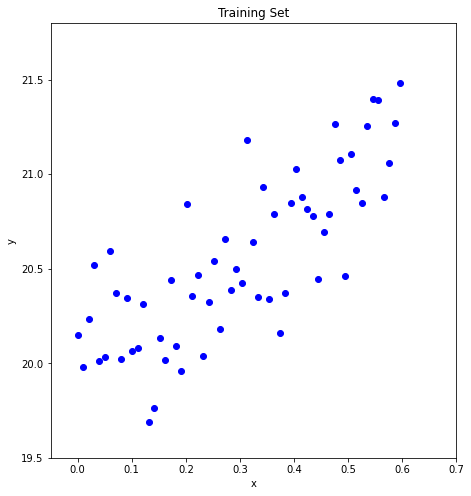

In [3]:
import matplotlib.pyplot as plt

def create_plot(file_name, index, name, param):
  data_set = get_data(file_name)
  plt.subplot(1, 2, index)
  plt.title(name)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.axis([-0.05, 0.7, 19.5, 21.8])
  plt.plot(data_set['x'], data_set['y'], param)

figure = plt.gcf()
figure.set_size_inches(16, 8)

create_plot('lab_1_train.csv', 1, 'Training Set', 'bo')
plt.show()

In [9]:
def gradient_descent(x, y, alpha = 0.01, num_iterations = 30000): 
    m = x.shape[0]
    changes = []
    theta, bias = 0, 0
    
    for i in range(num_iterations):
        # calculate the hypothesis
        hypothesis = np.dot(x, theta) + bias
        change = hypothesis - y
        changes.append(-np.mean(change))

        gradient = np.dot(x.T, change) / m
        dbias = np.sum(change) / m
        
        # update
        theta = theta - alpha * gradient
        bias = bias - alpha * dbias
        # calculate the loss
        loss = np.sum((y - (np.dot(x, theta) + bias))) / m
        print(f"Iteration: {i} | Theta: {theta} | Bias: {bias} | Loss: {loss}")
        
    return theta, bias, changes

x = get_data('lab_1_train.csv')['x']
y = get_data('lab_1_train.csv')['y']
alpha = 0.01
num_iterations = 30000
theta_trained, bias_trained, changes = gradient_descent(x, y, alpha, num_iterations)
    

Iteration: 0 | Theta: 0.06183906732682434 | Bias: 0.20549563191038453 | Loss: 20.325640766338758
Iteration: 1 | Theta: 0.12299196792752087 | Bias: 0.40875203957377215 | Loss: 20.104162029708498
Iteration: 2 | Theta: 0.1834661934701276 | Bias: 0.6097936598708571 | Loss: 19.88510031190124
Iteration: 3 | Theta: 0.24326915386121906 | Bias: 0.8086446629898695 | Loss: 19.6684292347263
Iteration: 4 | Theta: 0.3024081781382133 | Bias: 1.0053289553371325 | Loss: 19.45412270787225
Iteration: 5 | Theta: 0.36089051535194017 | Bias: 1.199870182415855 | Loss: 19.2421549257652
Iteration: 6 | Theta: 0.41872333543957824 | Bias: 1.392291731673507 | Loss: 19.032500364461225
Iteration: 7 | Theta: 0.4759137300880643 | Bias: 1.5826167353181193 | Loss: 18.825133778572877
Iteration: 8 | Theta: 0.5324687135880806 | Bias: 1.770868073103848 | Loss: 18.620030198229067
Iteration: 9 | Theta: 0.5883952236787214 | Bias: 1.9570683750861386 | Loss: 18.417164926068246
Iteration: 10 | Theta: 0.6437001223829422 | Bias: 2.

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



1.9796250876805737 19.959667685443534


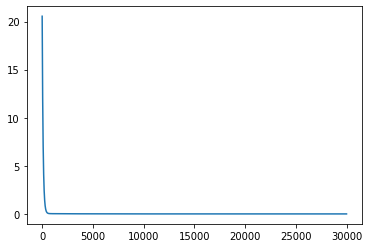

In [10]:
plt.plot(np.arange(num_iterations), changes)
print(theta_trained, bias_trained)

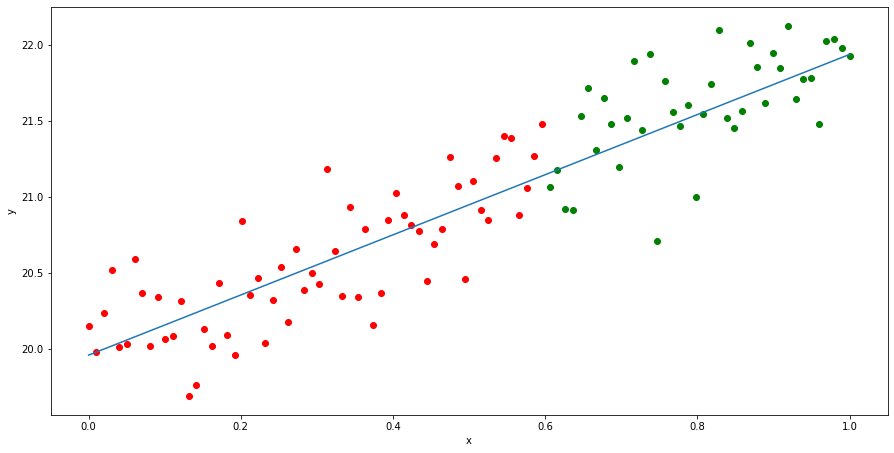

In [15]:
training_set = get_data('lab_1_train.csv')
test_set = get_data('lab_1_test.csv')

def show():
    x_total = np.concatenate((training_set['x'], test_set['x']))
    y_pred_total = theta_trained * x_total + bias_trained
    
    figure = plt.gcf()
    figure.set_size_inches(15, 7.5)
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.plot(training_set['x'], training_set['y'], 'ro')
    plt.plot(test_set['x'], test_set['y'], 'go')
    plt.plot(x_total, y_pred_total)
    plt.show()

show()
    